# Object Detection with KerasCV

In [1]:
#!pip install -q -r requirements.txt


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
!pip install --upgrade keras
!pip install --upgrade keras-cv

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/cd/43/b971880e2eb45c0bee2093710ae8044764a89afe9620df34a231c6f0ecd2/namex-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/08/e2/4c29cb9876456517f21979ddcbb6048f28a3b52c61aa9d14d42adafcdca4/dm_tree-0.1.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for markdown-it-py>=2.2.0 from https://files.pythonhosted.org/packages/42/d7/1ec15b46af6af88f19b8e5ffea08fa375d433c998b8a7639e76935c14f1f/markdown_it_py-3.0.0-py3-no

In [1]:
import keras
print(keras.__version__)

3.0.5


In [2]:
import keras_cv
print(keras_cv.__version__)

/Users/sam.treweek/BJSS/MetOffice/solar-flare/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.8.2


In [3]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]

from tensorflow import data as tf_data
import tensorflow_datasets as tfds
import keras
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
from keras_cv import visualization
import tqdm

In [4]:
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc", bounding_box_format="xywh"
)

100%|██████████| 2.27k/2.27k [00:00<00:00, 2.22MB/s]
100%|██████████| 99.5M/99.5M [01:05<00:00, 1.60MB/s]


1215963/1215963 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


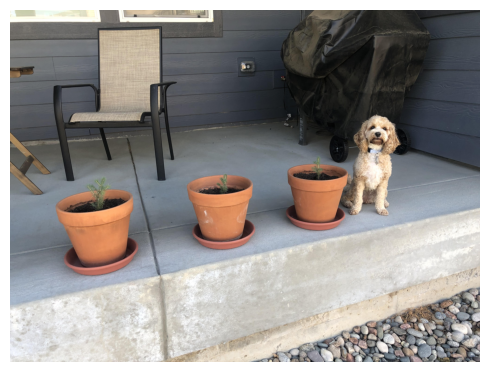

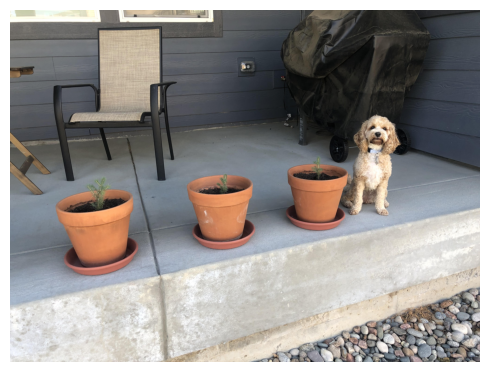

In [5]:
filepath = keras.utils.get_file(origin="https://i.imgur.com/gCNcJJI.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [6]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [7]:
image_batch = inference_resizing([image])

In [8]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


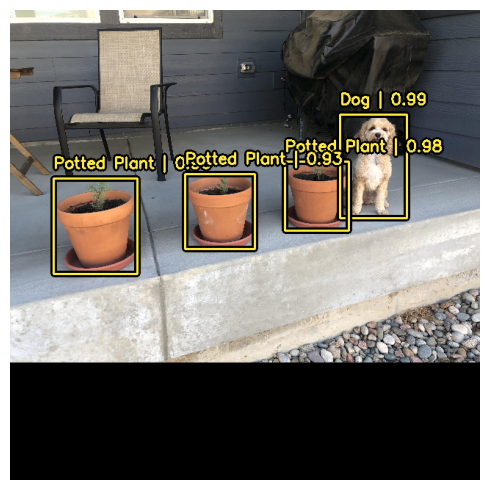

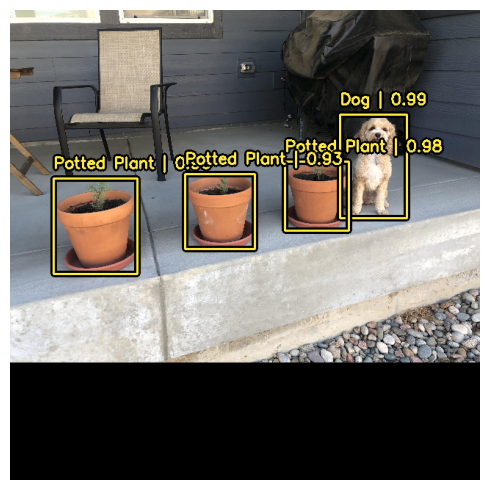

In [9]:
y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


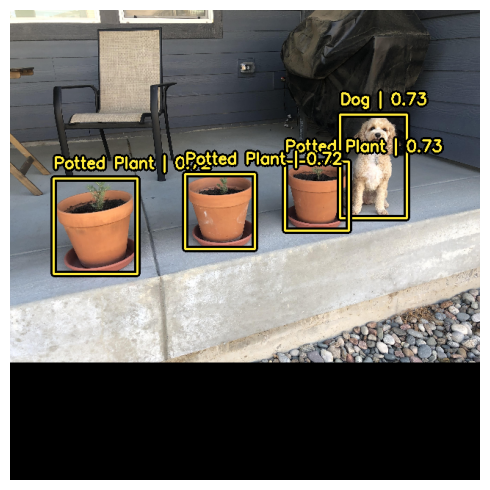

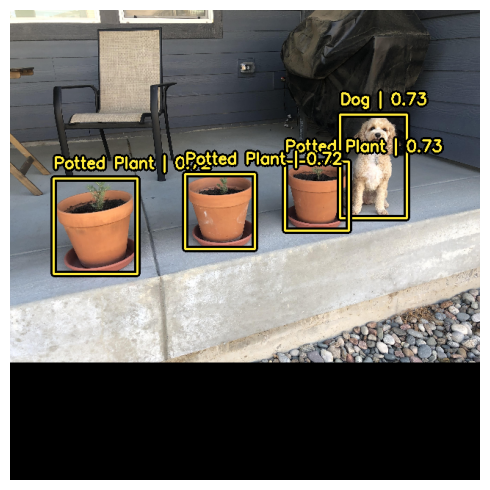

In [11]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    # Decrease the required threshold to make predictions get pruned out
    iou_threshold=0.2,
    # Tune confidence threshold for predictions to pass NMS
    confidence_threshold=0.7,
)
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh",
    prediction_decoder=prediction_decoder,
)

y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

# Custom

In [4]:
import os
from tqdm.auto import tqdm
import xml.etree.ElementTree as ET

/Users/sam.treweek/BJSS/MetOffice/solar-flare/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


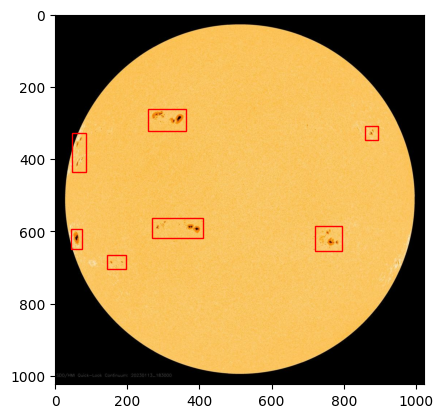

In [53]:
import tensorflow as tf
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def parse_xml(xml_content, image_width, image_height):
    root = ET.fromstring(xml_content)
    boxes = []
    classes = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)
        # Convert bounding box to "rel_xywh" format
        width = xmax - xmin
        height = ymax - ymin
        x_center = xmin + width / 2
        y_center = ymin + height / 2
        rel_x_center = x_center / image_width
        rel_y_center = y_center / image_height
        rel_width = width / image_width
        rel_height = height / image_height
        boxes.append([rel_x_center, rel_y_center, rel_width, rel_height])
        classes.append(name)
    return boxes, classes

def load_img_and_annotation(image_path, xml_path, image_width, image_height):
    img = tf.io.read_file(image_path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode JPEG image
    
    with open(xml_path, 'r') as f:
        xml_content = f.read()
    
    boxes, classes = parse_xml(xml_content, image_width, image_height)
    
    return img, {'boxes': boxes, 'classes': classes}

def visualize_image_with_boxes(image, annotation):
    fig, ax = plt.subplots(1)
    ax.imshow(image.numpy())
    
    boxes = annotation['boxes']
    for box in boxes:
        x_center, y_center, width, height = box
        x_min = (x_center - width / 2) * image.shape[1]
        y_min = (y_center - height / 2) * image.shape[0]
        rect = patches.Rectangle((x_min, y_min), width * image.shape[1], height * image.shape[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

# Example usage:
image_path = "dataset/voc_v1/test/20230113_183000_1024_HMIIF_jpg.rf.06e825a36d04ce09fd040f3a6dc5abcc.jpg"
xml_path = "dataset/voc_v1/test/20230113_183000_1024_HMIIF_jpg.rf.06e825a36d04ce09fd040f3a6dc5abcc.xml"
image_width = 1024
image_height = 1024
image, annotation = load_img_and_annotation(image_path, xml_path, image_width, image_height)
visualize_image_with_boxes(image, annotation)
